## 1. One-way ANOVA를 통하여 클래스의 영향력을 계산해보자.

- F검정의 귀무가설
 - $\alpha_1=\alpha_2=...=\alpha_k=0$ 즉 클래스간 차이가 없는 경우이다.
- 대립가설
 - $\alpha_k$중 0이 아닌 것이 존재한다.

In [1]:
# 보스턴 집 값 데이터를 이용해보자.
from sklearn.datasets import load_boston
import statsmodels.tools.tools as sm
import statsmodels.regression.linear_model as lm
import statsmodels.stats.anova as _anova
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

boston = load_boston()

x0_df = pd.DataFrame(boston.data, columns=boston.feature_names)
y_df = pd.DataFrame(boston.target, columns=["Target"])
x_df = sm.add_constant(x0_df)
boston_df = pd.concat([x_df, y_df], axis=1)

# boston.DESCR
boston_df.head(15)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,1.0,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,1.0,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,1.0,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,1.0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,1.0,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


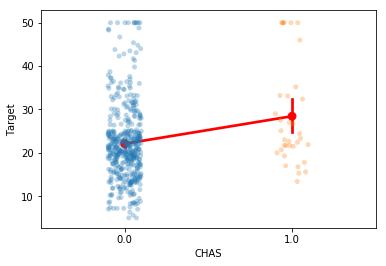

In [5]:
"""1. 보스턴 집값 자료에서 변수 CHAS의 영향을 분삭 분석으로 알아보자."""

sns.stripplot(x="CHAS", y="Target", data=boston_df, jitter=True, alpha=.3)
sns.pointplot(x="CHAS", y="Target", data=boston_df, dodge=True, color='r')

plt.show()

In [4]:
# 분산비에 대한 F값을 구해보자.
model = lm.OLS.from_formula("Target ~ C(CHAS) + 0", data=boston_df)
_anova.anova_lm(model.fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),2.0,258222.123856,129111.061928,1571.626788,2.495018e-217
Residual,504.0,41404.216144,82.151223,NaN,NaN


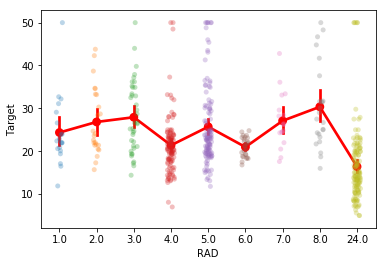

In [4]:
"""2. 보스턴 집값 자료에서 변수 RAD의 영향을 분산 분석으로 알아보자."""

sns.stripplot(x="RAD", y="Target", data=boston_df, jitter=True, alpha=.3)
sns.pointplot(x="RAD", y="Target", data=boston_df, dodge=True, color='r')

plt.show()

In [6]:
# 분산비에 대한 F값을 구해보자.
model = lm.OLS.from_formula("Target ~ C(RAD) + 0", data=boston_df)
_anova.anova_lm(model.fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(RAD),9.0,266677.304387,29630.811599,446.948237,8.112365e-232
Residual,497.0,32949.035613,66.295846,NaN,NaN


## 2. `pyvttbl`를 사용하여 One-way ANOVA를 구해보자.

In [8]:
import pandas as pd
import io
import requests
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


### <U>1. box plot을 구해보자.</U>

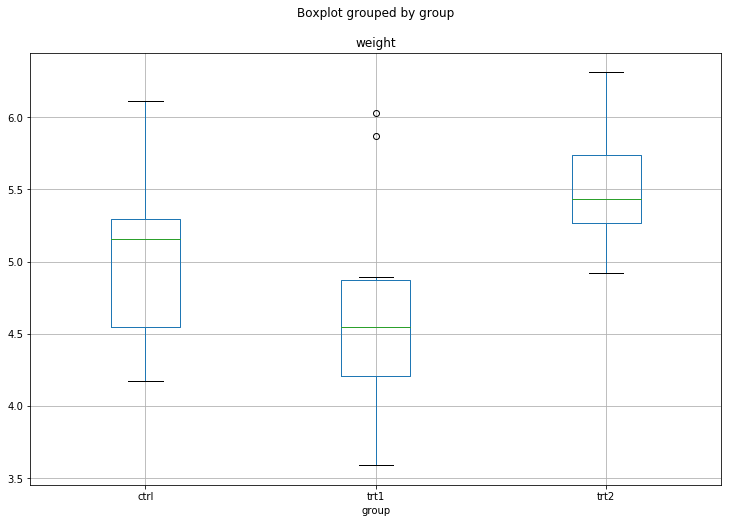

In [10]:
%matplotlib inline
df.boxplot('weight', by='group', figsize=(12, 8))

### <U>2. `f_oneway`를 사용하자.</U>

In [11]:
groups = df.groupby('group')
groups = [groups.get_group(key) for key in groups.groups]

group_1 = groups[0]['weight']
group_1 = list(group_1)

group_2 = groups[1]['weight']
group_2 = list(group_2)

group_3 = groups[2]['weight']
group_3 = list(group_3)

from scipy.stats import f_oneway
f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=4.8460878623801351, pvalue=0.01590995832562293)

p-value가 0.015이므로 3개의 그룹간에 차이가 없다(모평균이 동일하다)는 가설을 기각할 수 있다.